In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 88% 76.0M/86.8M [00:00<00:00, 121MB/s] 
100% 86.8M/86.8M [00:00<00:00, 114MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-classification-mri.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
import os

path = os.listdir('/content/Training/')
classes = {'no_tumor':0,'glioma_tumor':1,'meningioma_tumor':2,'pituitary_tumor':3}
print(classes['glioma_tumor'])

1


In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
print(len(X))
print(len(Y))

2870
2870


In [ ]:
type(X)

list

In [ ]:
X = np.array(X)
Y = np.array(Y)


In [ ]:
type[Y]

type[array([0, 0, 0, ..., 3, 3, 3])]

In [ ]:
np.unique(Y)

array([0, 1, 2, 3])

In [ ]:
X.shape

(2870, 200, 200)

In [ ]:
Y.shape

(2870,)

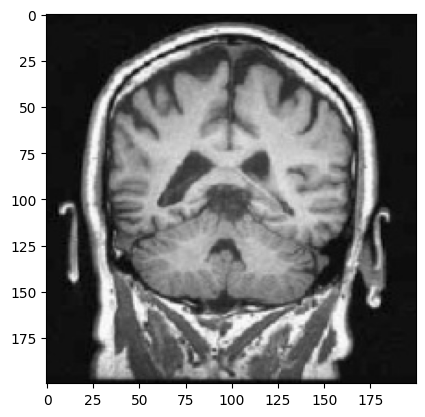

In [ ]:
plt.imshow(X[0], cmap='gray')

array([[14, 17, 19, ..., 16, 16, 16],
       [16, 17, 19, ..., 16, 16, 16],
       [16, 16, 17, ..., 16, 16, 16],
       ...,
       [15, 15, 15, ..., 15, 15, 15],
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16]], dtype=uint8)
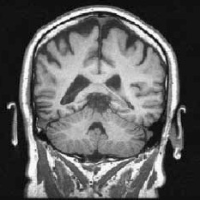

In [ ]:
X[0]

In [ ]:
X=X/255.

In [ ]:
X[0]

array([[0.05490196, 0.06666667, 0.0745098 , ..., 0.0627451 , 0.0627451 ,
        0.0627451 ],
       [0.0627451 , 0.06666667, 0.0745098 , ..., 0.0627451 , 0.0627451 ,
        0.0627451 ],
       [0.0627451 , 0.0627451 , 0.06666667, ..., 0.0627451 , 0.0627451 ,
        0.0627451 ],
       ...,
       [0.05882353, 0.05882353, 0.05882353, ..., 0.05882353, 0.05882353,
        0.05882353],
       [0.0627451 , 0.0627451 , 0.0627451 , ..., 0.0627451 , 0.0627451 ,
        0.0627451 ],
       [0.0627451 , 0.0627451 , 0.0627451 , ..., 0.0627451 , 0.0627451 ,
        0.0627451 ]])

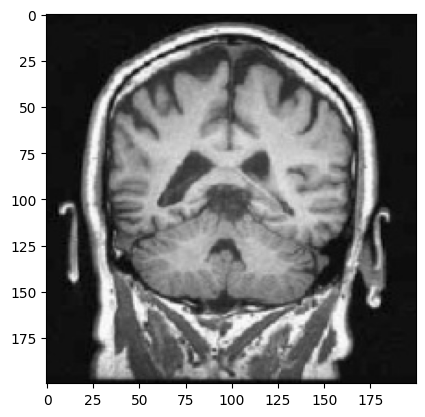

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
# create CNN model
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(200,200,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 198, 198, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 198, 198, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 99, 99, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 97, 97, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 97, 97, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 46, 46, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,899,140 (33.95 MB)

 Trainable params: 8,898,500 (33.95 MB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
history = model.fit(X, Y, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 671s 19s/step - accuracy: 0.5385 - loss: 3.2248 - val_accuracy: 0.0000e+00 - val_loss: 21.0492
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 671s 18s/step - accuracy: 0.6422 - loss: 1.2627 - val_accuracy: 0.0000e+00 - val_loss: 3.6185
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 697s 19s/step - accuracy: 0.6864 - loss: 0.9330 - val_accuracy: 0.0401 - val_loss: 2.0814
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 677s 19s/step - accuracy: 0.7530 - loss: 0.7730 - val_accuracy: 1.0000 - val_loss: 6.3846e-04
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 674s 18s/step - accuracy: 0.7865 - loss: 0.5731 - val_accuracy: 0.1777 - val_loss: 2.2514


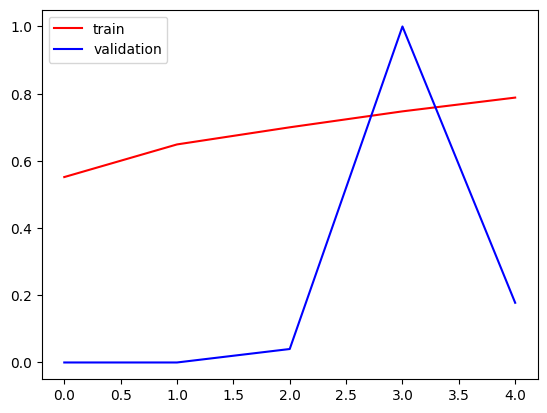

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color ='blue',label='validation')
plt.legend()
plt.show()

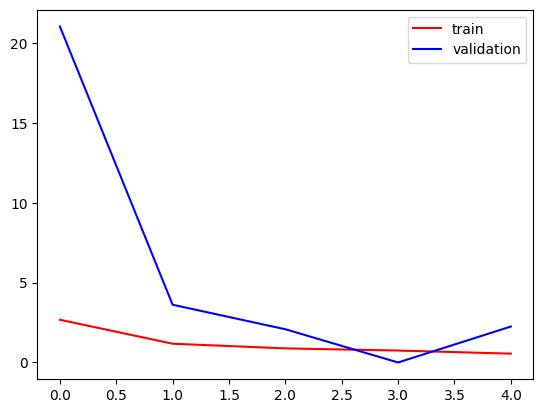

In [73]:
plt.plot(history.history['loss'], color = 'red', label='train')
plt.plot(history.history['val_loss'], color ='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexi

In [ ]:
data = []
data.append(img, classes[cls])

In [ ]:
import random
random.shuffle(data)

In [ ]:
X =[]
y= []

for features, label in data:
    X.append(features)
    y.append(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


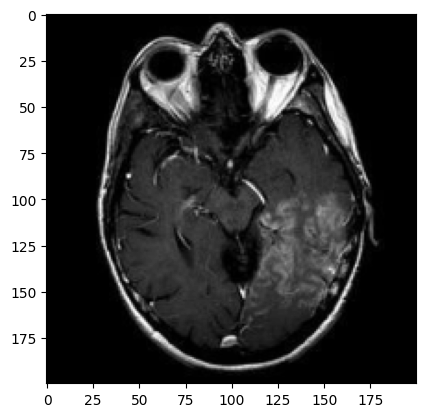

In [220]:
img = cv2.imread('/content/Testing/glioma_tumor/image(53).jpg',0)
img1 = cv2.resize(img, (200,200))
img1 = img1.reshape(1,200,200,1)/255
plt.imshow(img1[0], cmap='gray')
p = model.predict(img1)

In [221]:
score = tf.nn.softmax(p)
print(score)

tf.Tensor([[0.19180675 0.1784493  0.1784494  0.45129454]], shape=(1, 4), dtype=float32)


In [222]:
data=['no_tumor','glioma_tumor','meningioma_tumor','pituitary_tumor']

In [223]:
data[np.argmax(score)],np.max(score)*100

('pituitary_tumor', 45.129454135894775)